# K Distanced Neighbor

Similar to DBSCAN.

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
a = np.loadtxt("data/fcps_lsun.data")

In [3]:
# data set is well completely connected and shows the intended clusters 0.45 <= max_distance <= 0.55

max_distance = 0.45
temp_list = []
for i in range(a.shape[0]):
    for j in range(i+1, a.shape[0]):
        if math.dist(a[i], a[j]) < max_distance:
            temp_list.append([i, j])

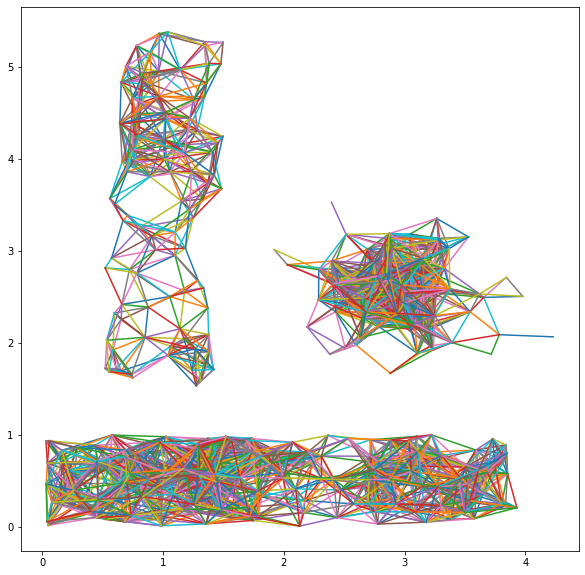

In [4]:
plt.figure(figsize=(10,10))

for tup in temp_list:
    plt.plot([a[tup[0]][0], a[tup[1]][0]], [a[tup[0]][1], a[tup[1]][1]])

In [5]:
max_distance = 0.55
temp_list = []
for i in range(a.shape[0]):
    for j in range(i+1, a.shape[0]):
        if math.dist(a[i], a[j]) < max_distance:
            temp_list.append([i, j])

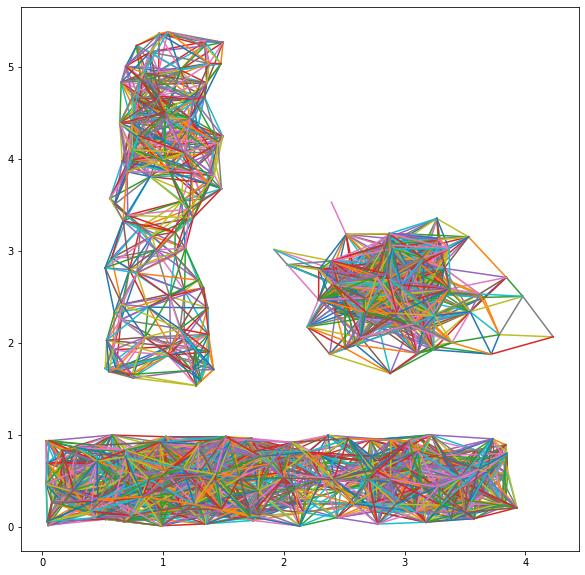

In [6]:
plt.figure(figsize=(10,10))

for tup in temp_list:
    plt.plot([a[tup[0]][0], a[tup[1]][0]], [a[tup[0]][1], a[tup[1]][1]])

In [7]:
max_distance = 0.45
temp_list = []
for i in range(a.shape[0]):
    for j in range(i+1, a.shape[0]):
        if math.dist(a[i], a[j]) < max_distance:
            temp_list.append({i, j})

In [8]:
for i in range(len(temp_list)):
    for j in range(i+1, len(temp_list)):
        if temp_list[i].intersection(temp_list[j]) != set():
            temp_list[j] = temp_list[j].union(temp_list[i])
            temp_list[i] = set()

In [9]:
b = []
for item in temp_list:
    if item != set():
        b.append(item)

In [10]:
c = np.zeros((a.shape[0]))

In [11]:
n=1
for item in b:
    for j in item:
        c[int(j)] = n
    n+=1

In [12]:
# A function to make plotting easy
# to plot an unlabeled dataset X use np.zeros(X.shape[0]) as labels
# Adjusted from: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

def plot_clustering(X, labels, outliers=-1):
    """
    Plots the clustering in color for 2 dimensional data sets.
    Taken from an example on the scikit-learn homepage and 
    adjusted. Reference above. License from scikit-learn applies
    """
    # square to not disturb visual accuracy
    plt.figure(figsize=(10,10))

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == outliers:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)   
    plt.show()
    #plt.savefig("lsun.png")

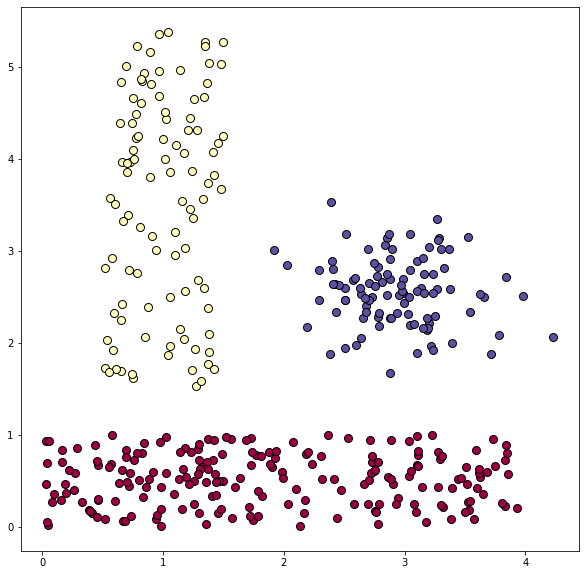

In [13]:
plot_clustering(a, c, outliers=-1)